In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/usgs_data_small.csv")

In [3]:
GEO_SPLIT = 1
df["longitude_disc"] = (df["longitude"] // GEO_SPLIT * GEO_SPLIT).astype(int)
df["latitude_disc"] = (df["latitude"] // GEO_SPLIT * GEO_SPLIT).astype(int)
df["pos"] = df["latitude_disc"].astype(str) + "_" + df["longitude_disc"].astype(str)

In [4]:
df

,time,longitude,latitude,depth,mag,magType,longitude_disc,latitude_disc,pos
0,1940-01-06 20:04:35.170000,25.814000,35.373000,15.00,5.84,mw,25,35,35_25
1,1940-01-06 09:15:39.210000,151.498000,45.077000,25.00,6.07,mw,151,45,45_151
2,1940-01-05 09:42:55.570000,-116.367333,33.173167,6.00,3.42,ml,-117,33,33_-117
3,1940-01-05 07:20:50.460000,-119.442000,32.929333,6.00,3.97,ml,-120,32,32_-120
4,1940-01-04 21:44:55.390000,37.926000,40.415000,15.00,5.51,mw,37,40,40_37
...,...,...,...,...,...,...,...,...,...
4152281,2023-09-24 02:20:39.520000,-117.314167,34.071333,16.11,1.09,ml,-118,34,34_-118
4152282,2023-09-24 02:11:22.160000,-155.259000,58.195167,2.55,0.14,ml,-156,58,58_-156
4152283,2023-09-24 02:10:46.071000,-119.668800,40.223400,8.40,0.70,ml,-120,40,40_-120
4152284,2023-09-24 02:06:35.040000,-123.223333,39.279500,4.43,1.91,md,-124,39,39_-124


In [5]:
df["pos"].nunique()

13434

In [6]:
df["time"] = df["time"].apply(lambda x: x[:4])
df = df[df["time"] > "1950"]

In [7]:
df

,time,longitude,latitude,depth,mag,magType,longitude_disc,latitude_disc,pos
15786,1951,-80.993000,7.329000,54.40,6.59,mw,-81,7,7_-81
15787,1951,-115.733500,32.572500,6.00,3.29,ml,-116,32,32_-116
15788,1951,-115.437000,32.999500,6.00,3.03,ml,-116,32,32_-116
15789,1951,-80.835000,7.331000,15.00,5.91,mw,-81,7,7_-81
15790,1951,-116.187000,33.209167,6.00,2.77,ml,-117,33,33_-117
...,...,...,...,...,...,...,...,...,...
4152281,2023,-117.314167,34.071333,16.11,1.09,ml,-118,34,34_-118
4152282,2023,-155.259000,58.195167,2.55,0.14,ml,-156,58,58_-156
4152283,2023,-119.668800,40.223400,8.40,0.70,ml,-120,40,40_-120
4152284,2023,-123.223333,39.279500,4.43,1.91,md,-124,39,39_-124


In [8]:
def generateTEXtable(df, out, n=5):
    columns = df.columns
    with open(out, 'w') as file:
        file.writelines([
            "\\begin{table}[h]\n",
            "    \centering\n",
            "    \\begin{tabularx}{\\textwidth}{|" + "X|"*len(columns) + "} \\hline\n"
        ])

        header = " "*8 + "\\textbf{" + columns[0] + "}"
        for col in columns[1:]:
            header = header + " & \\textbf{" + col + "}"
        header = header + " \\\\ \\hline\n"
        file.write(header)

        lines = []
        for i in range(n):
            try:
                line = f"{df.loc[i, columns[0]]:.2f}"
            except ValueError:
                line = df.loc[i, columns[0]]
            for col in columns[1:]:
                try:
                    val = f"{df.loc[i, col]:.2f}"
                except ValueError:
                    val = df.loc[i, col]
                line = line + " & " + val
            line = " "*8 + line + " \\\\ \\hline\n"

            lines.append(line)

        file.writelines(lines)

        file.writelines([
            "    \\end{tabularx}\n",
            "    \\caption{caption}\n",
            "    \\label{label}\n",
            "\\end{table}\n"
        ])

In [9]:
generateTEXtable(df.reset_index(drop=True), '../utils/test.txt')

In [10]:
len(df), df["pos"].nunique()

(4136500, 13137)

In [12]:
df_tp = pd.read_csv("../data/all.csv").dropna().drop_duplicates()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


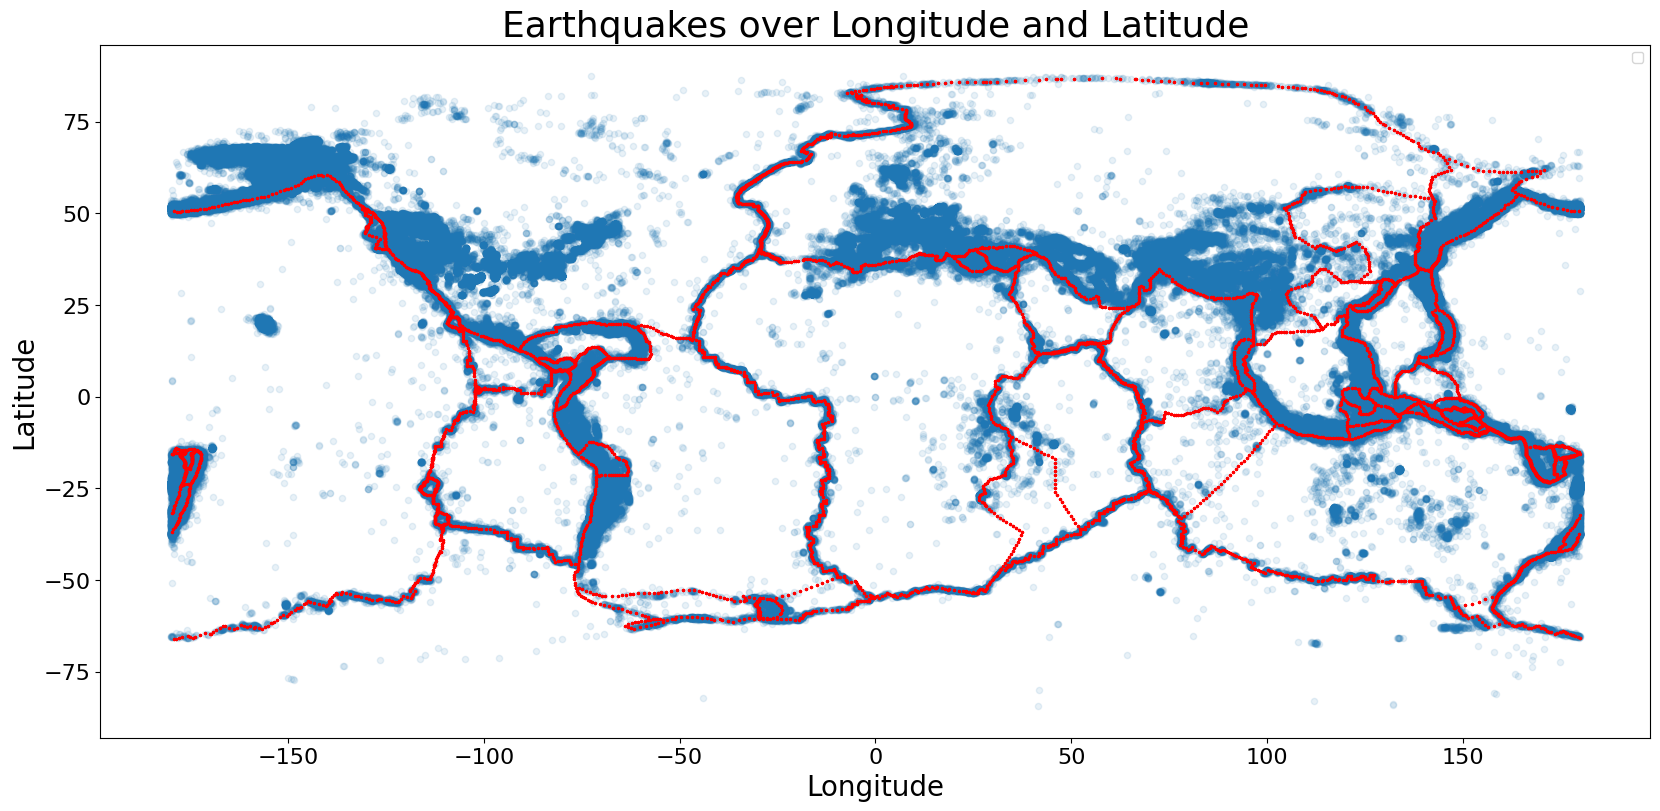

In [28]:
# plot count of earthquakes over longitude and latitude
df.plot.scatter(x="longitude", y="latitude", alpha=0.1, figsize=(20, 9))
plt.scatter(df_tp["lon"], df_tp["lat"], color="red", s=2)
plt.title("Earthquakes over Longitude and Latitude", fontsize=26)
plt.xlabel("Longitude", fontsize=20)
plt.ylabel("Latitude", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

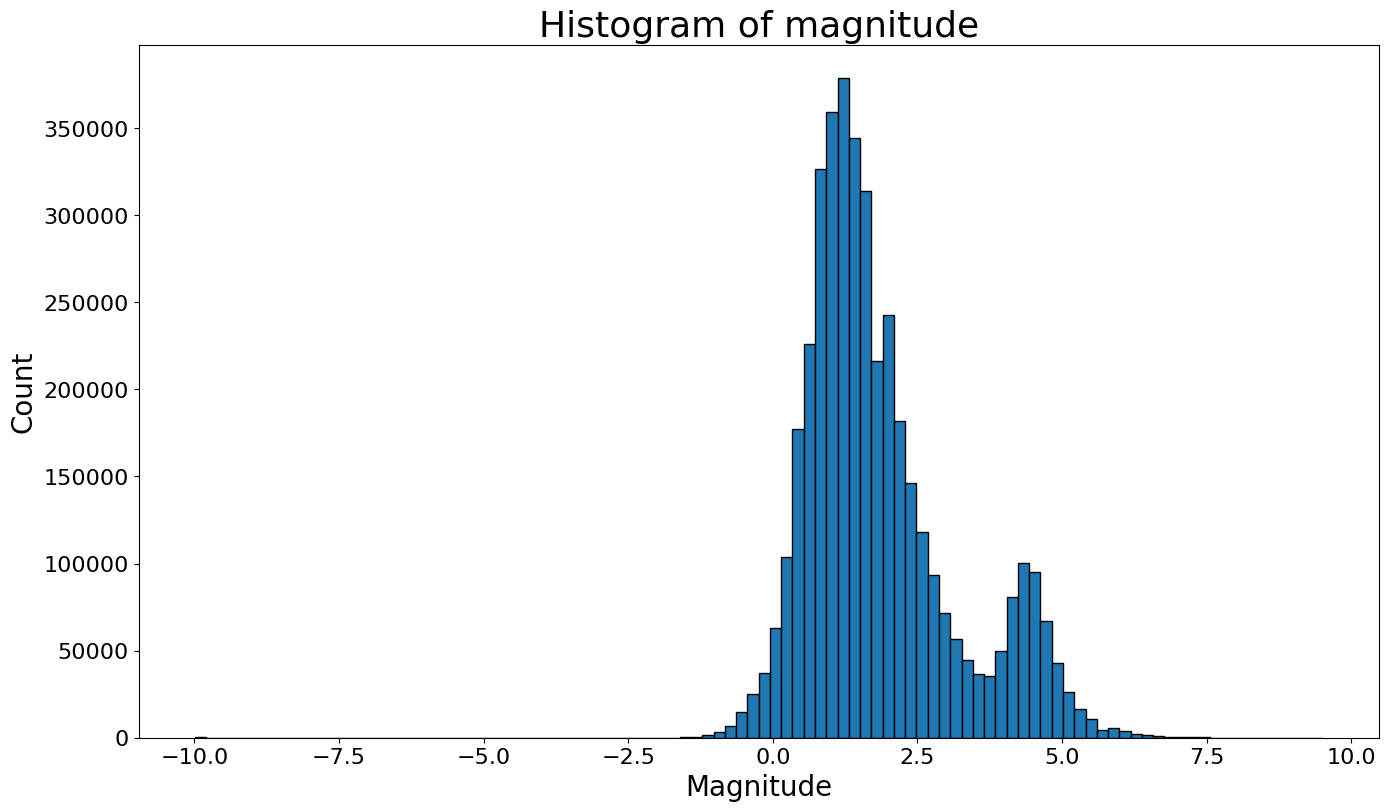

In [9]:
# plot magnitude
df["mag"].plot.hist(bins=100, edgecolor="black", figsize=(16, 9))
plt.title("Histogram of magnitude", fontsize=26)
plt.ylabel("Count", fontsize=20)
plt.xlabel("Magnitude", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

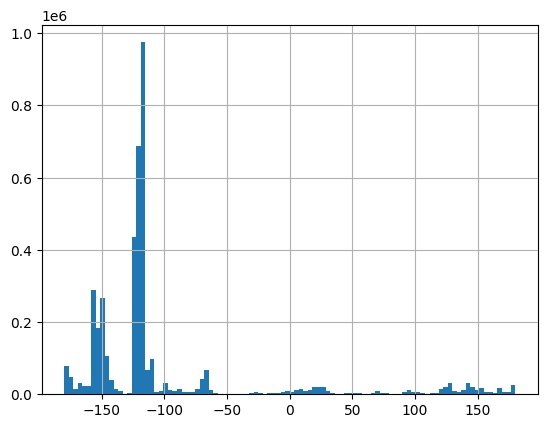

In [10]:
# plot count of earthquakes over longitude
df["longitude"].hist(bins=100)
plt.show()

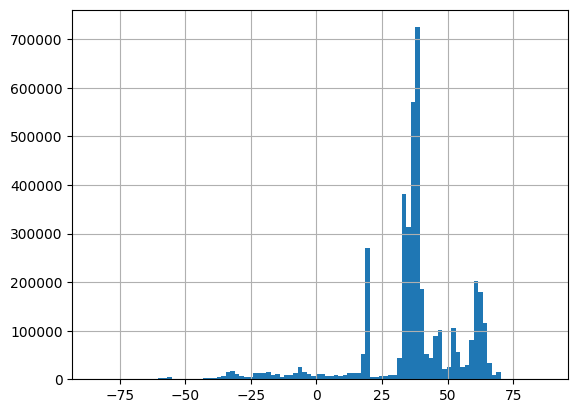

In [11]:
# plot count of earthquakes over latitude
df["latitude"].hist(bins=100)
plt.show()

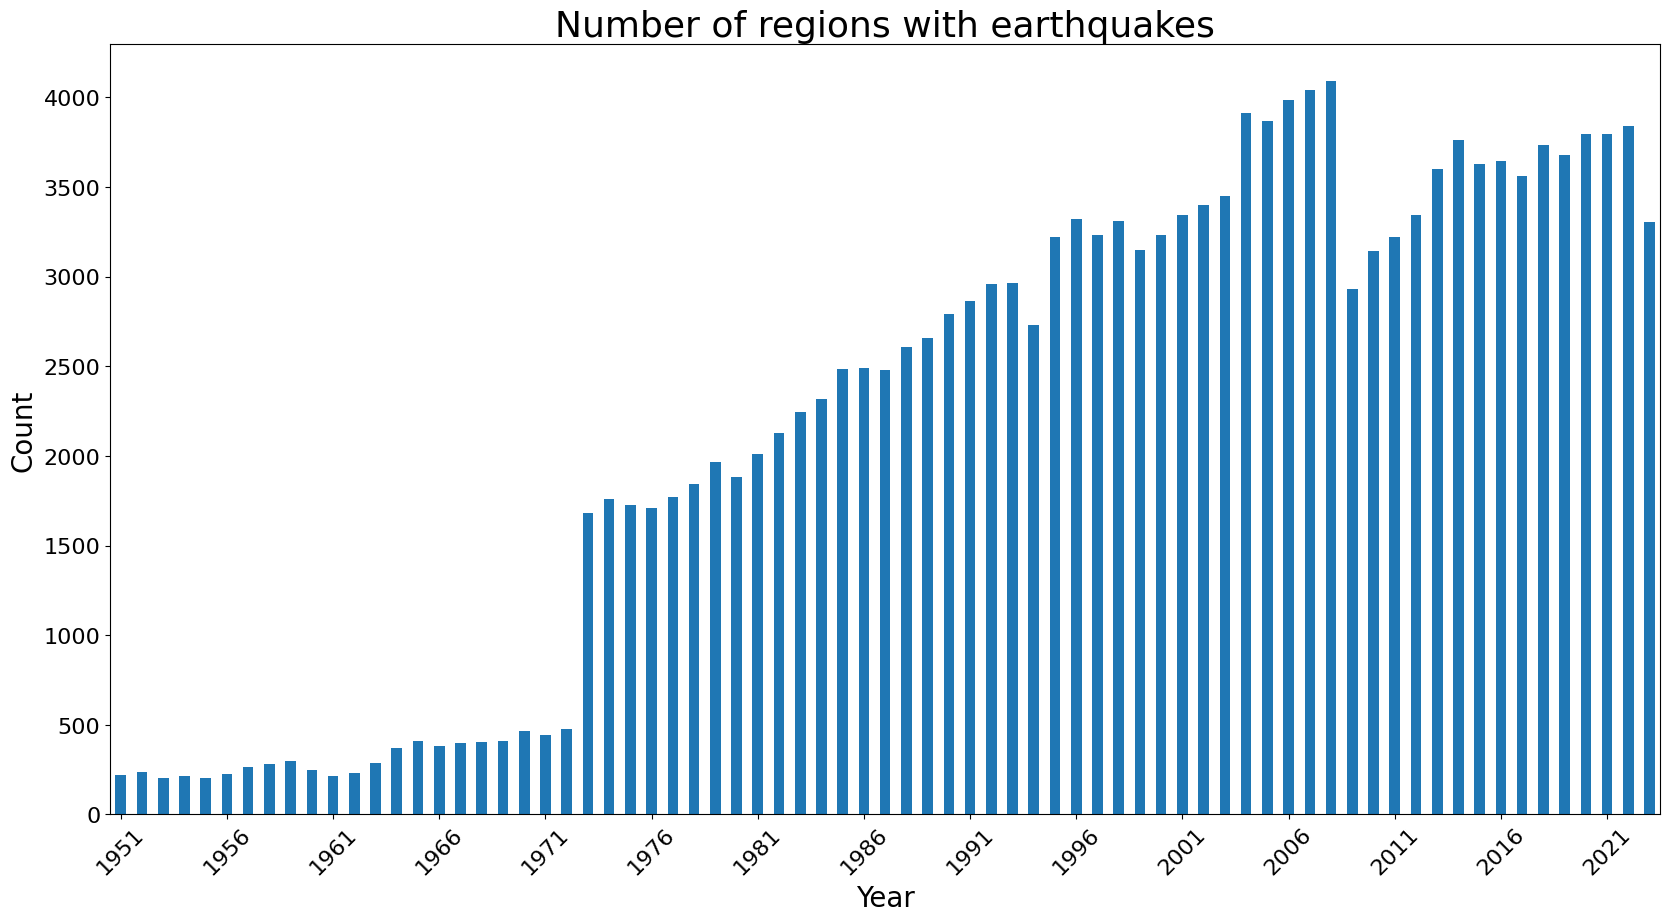

In [12]:
# get number of regions with eq per year
df.groupby(["time", "pos"]).count().reset_index().groupby("time").agg({"mag": "count"}).plot.bar(figsize=(20, 10), legend=False)
plt.xlabel("Year", fontsize=20)
plt.title("Number of regions with earthquakes", fontsize=26)
plt.ylabel("Count", fontsize=20)
plt.xticks(np.arange(0, len(df["time"].unique()), 5), df["time"].unique()[::5], rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

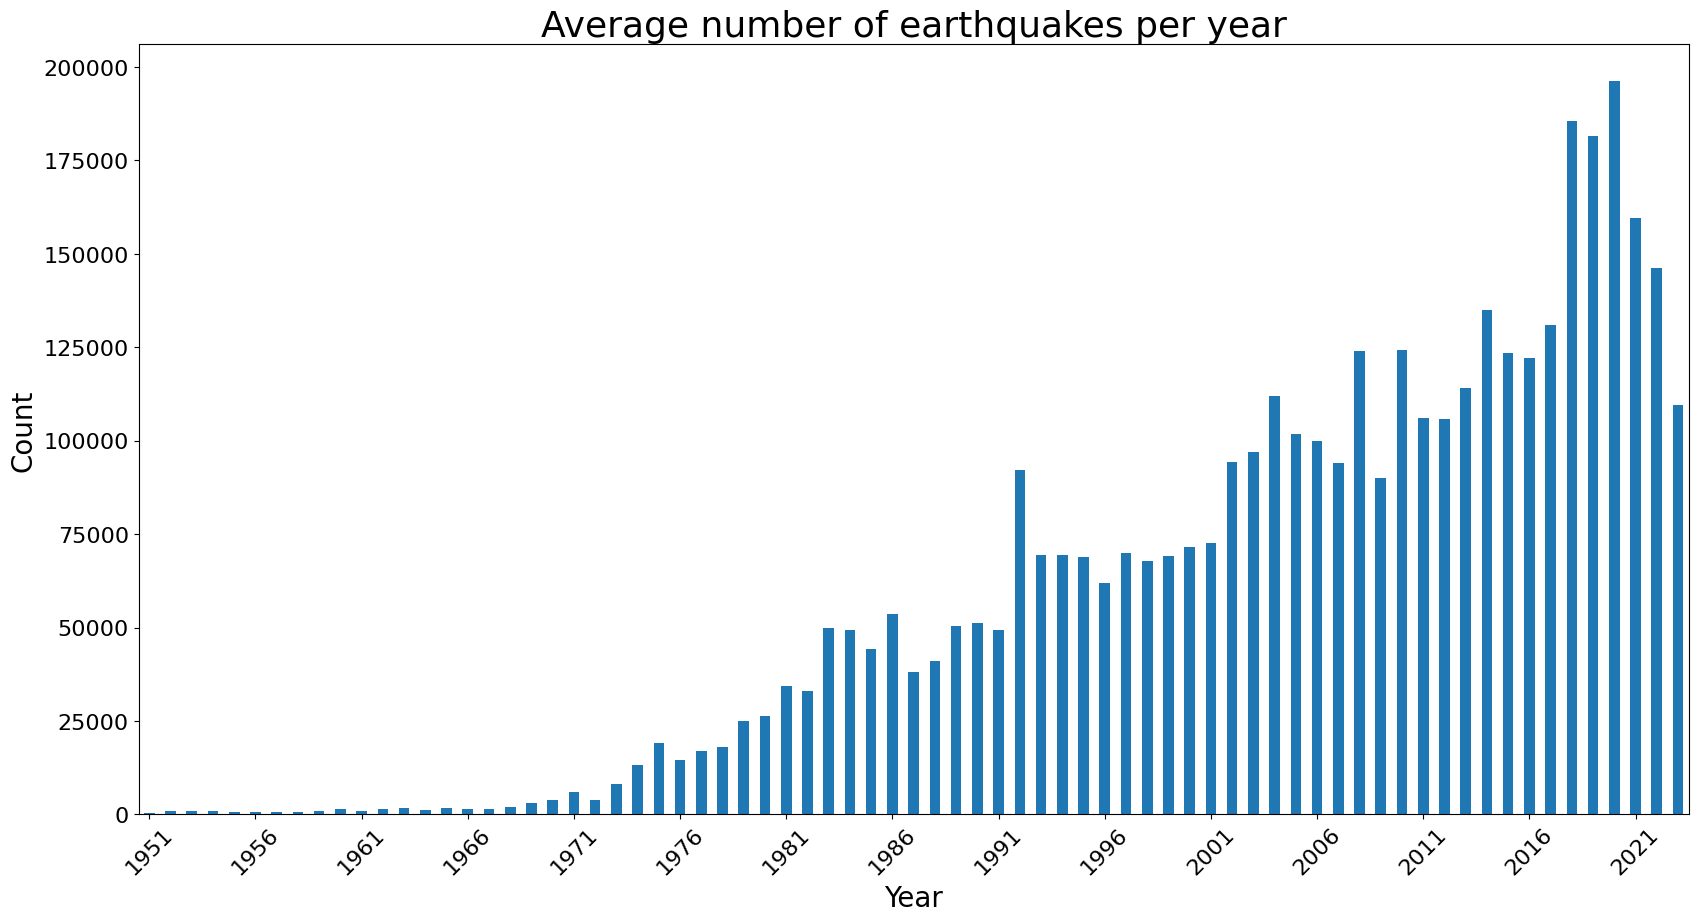

In [13]:
# get average number of earthquakes per year
df.groupby("time").agg({"mag": "count"}).plot.bar(figsize=(20, 10), legend=False)
plt.xlabel("Year", fontsize=20)
plt.title("Average number of earthquakes per year", fontsize=26)
plt.ylabel("Count", fontsize=20)
plt.xticks(np.arange(0, len(df["time"].unique()), 5), df["time"].unique()[::5], rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

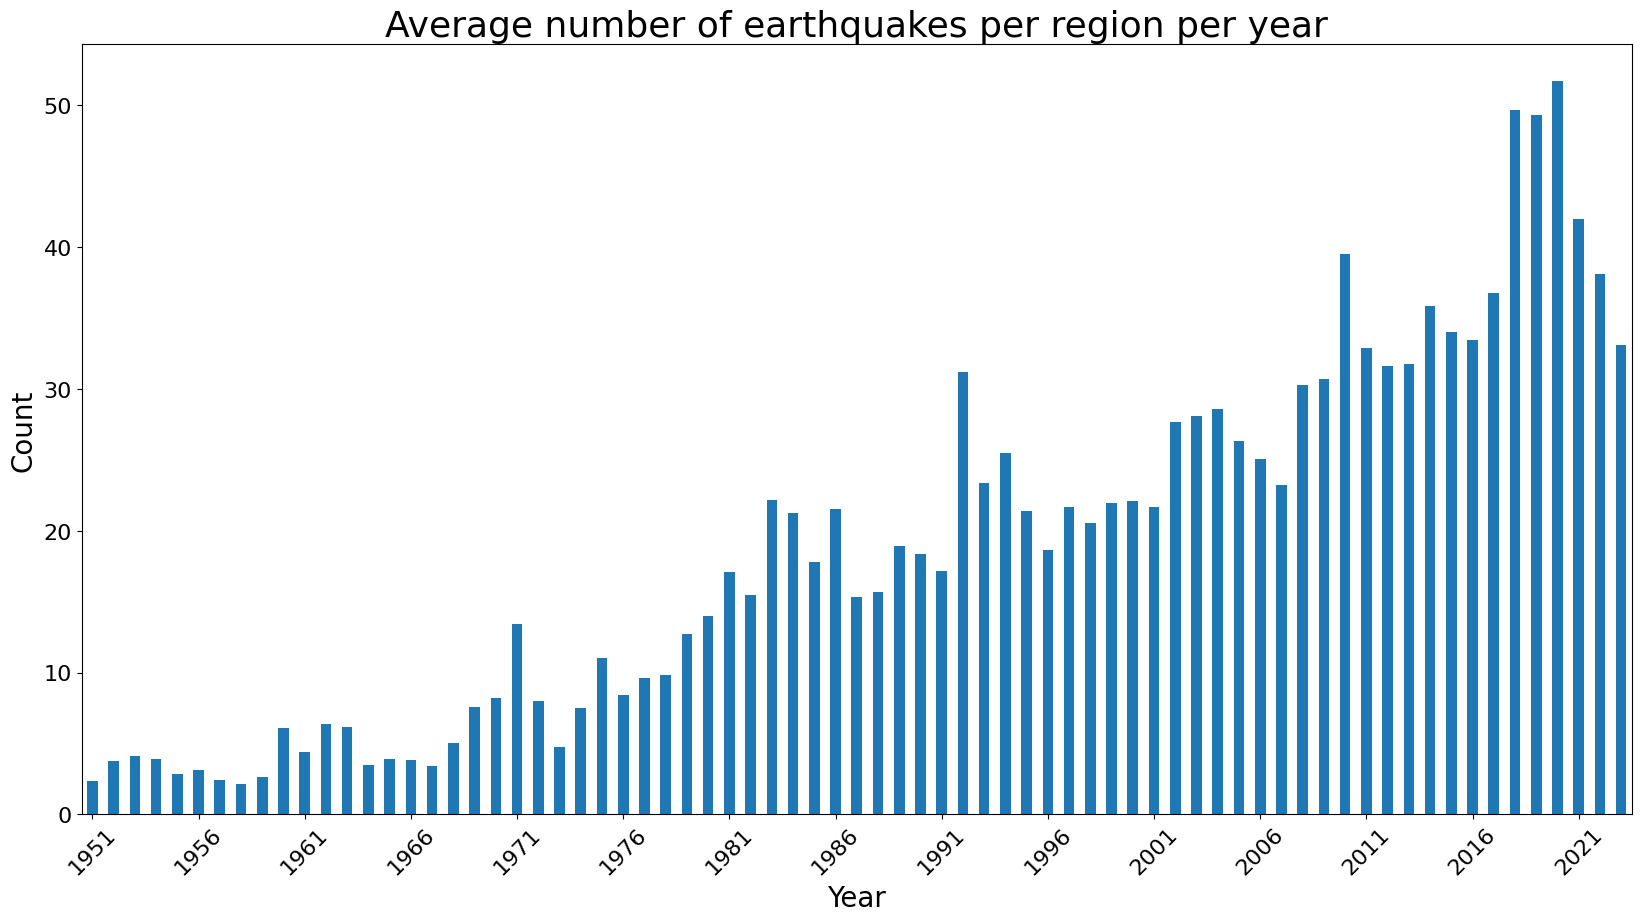

In [14]:
# get average number of earthquakes per region per year
df.groupby(["time", "pos"]).count().reset_index().groupby("time").agg({"mag": "mean"}).plot.bar(figsize=(20, 10), legend=False)
plt.xlabel("Year", fontsize=20)
plt.title("Average number of earthquakes per region per year", fontsize=26)
plt.ylabel("Count", fontsize=20)
plt.xticks(np.arange(0, len(df["time"].unique()), 5), df["time"].unique()[::5], rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

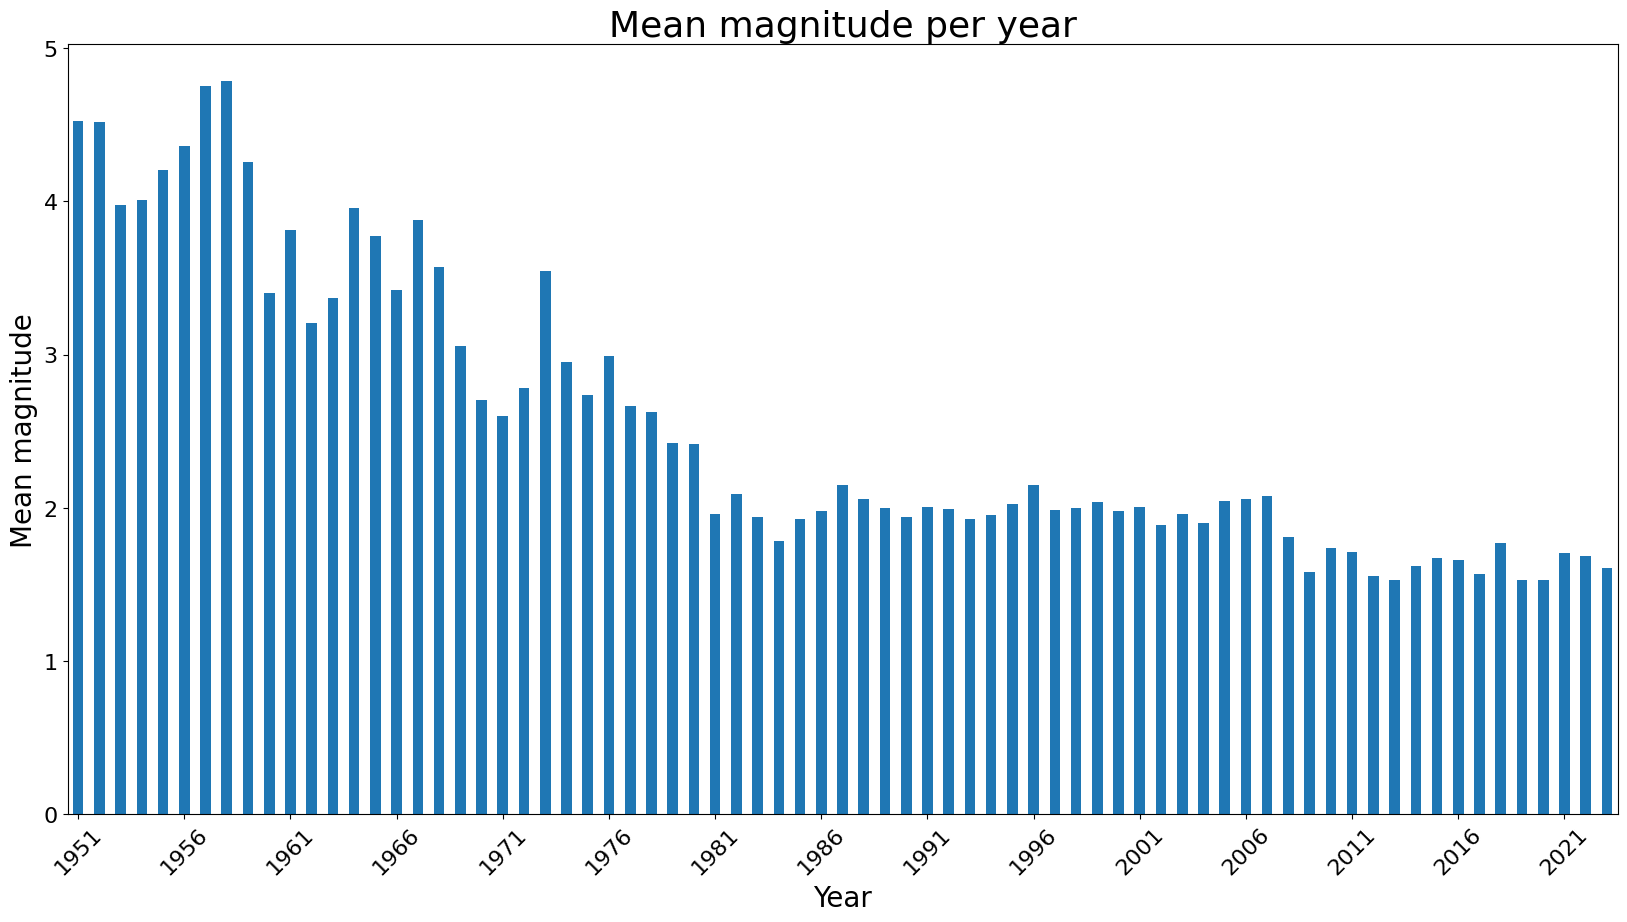

In [15]:
# get mean magnitude per year
df.groupby("time").agg({"mag": "mean"}).plot.bar(figsize=(20, 10), legend=False)
plt.xlabel("Year", fontsize=20)
plt.title("Mean magnitude per year", fontsize=26)
plt.ylabel("Mean magnitude", fontsize=20)
plt.xticks(np.arange(0, len(df["time"].unique()), 5), df["time"].unique()[::5], rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

<Axes: xlabel='time'>

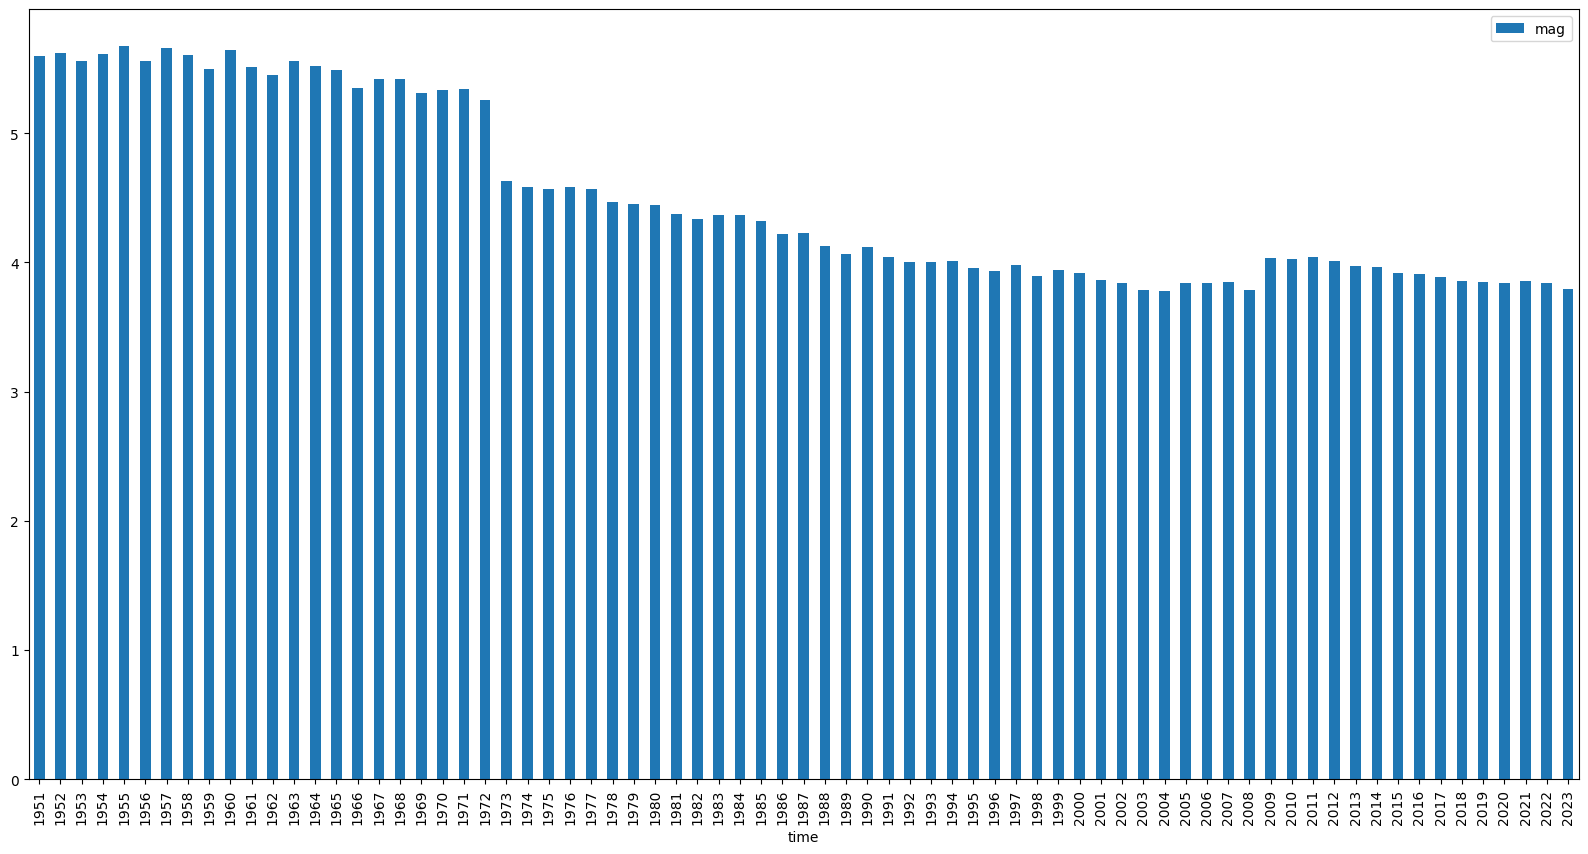

In [16]:
# get mean magnitude per region per year
df.groupby(["time", "pos"]).agg({"mag": "mean"}).reset_index().groupby("time").agg({"mag": "mean"}).plot.bar(figsize=(20, 10))

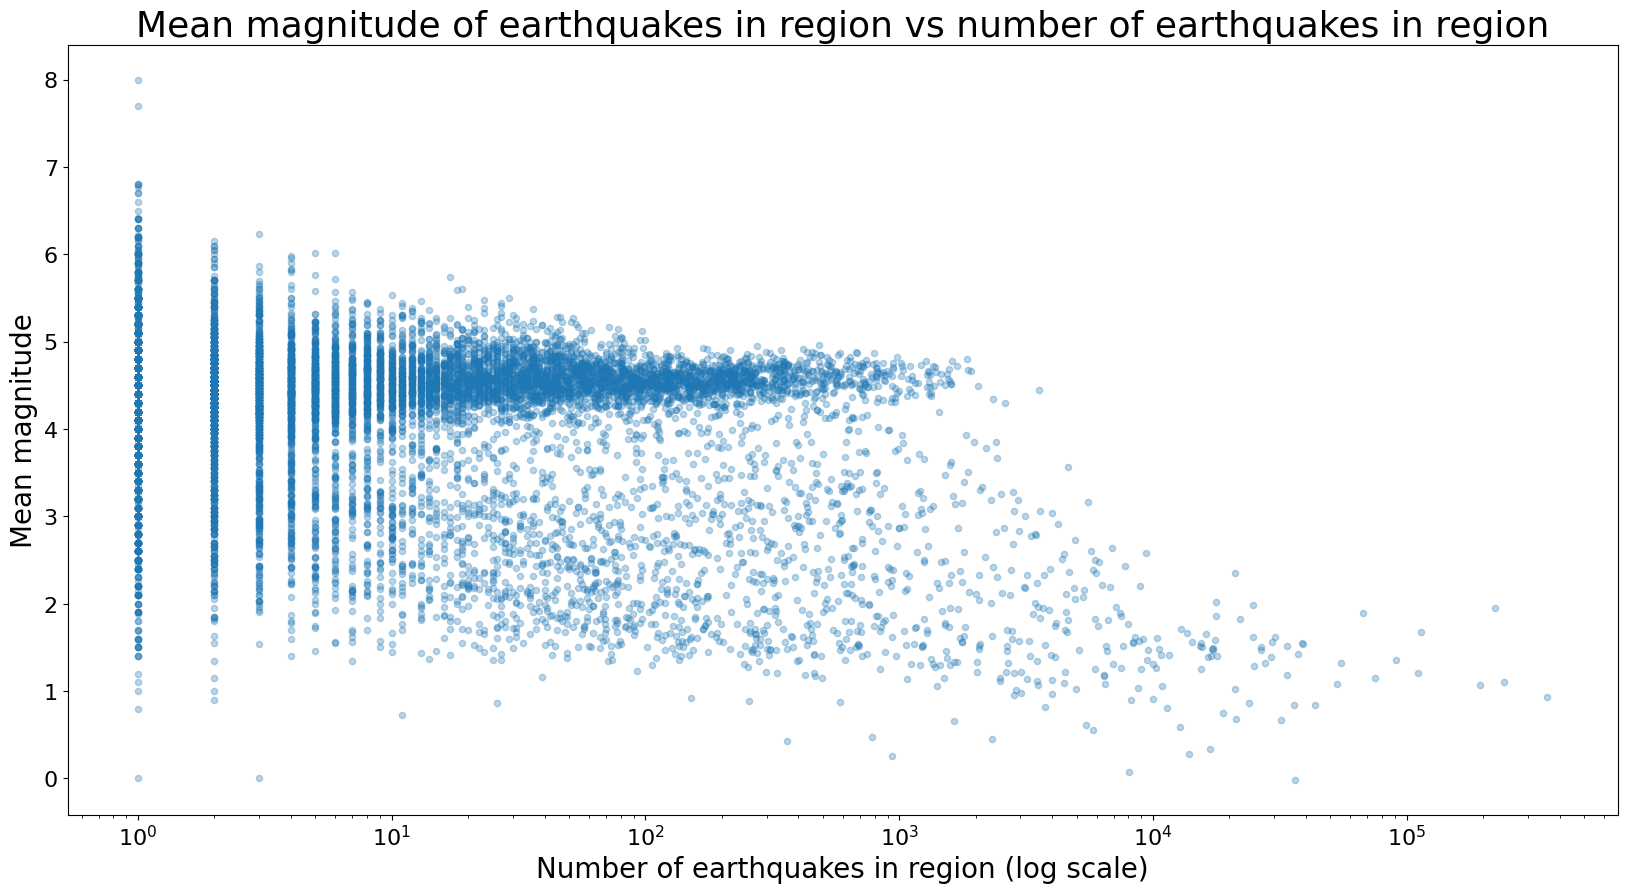

In [6]:
df.groupby(["pos"]).agg({"mag": "mean", "time": "count"}).reset_index().plot.scatter(x="time", y="mag", figsize=(20, 10), alpha=0.3)
plt.xscale("log")
plt.title("Mean magnitude of earthquakes in region vs number of earthquakes in region", fontsize=26)
plt.xlabel("Number of earthquakes in region (log scale)", fontsize=20)
plt.ylabel("Mean magnitude", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

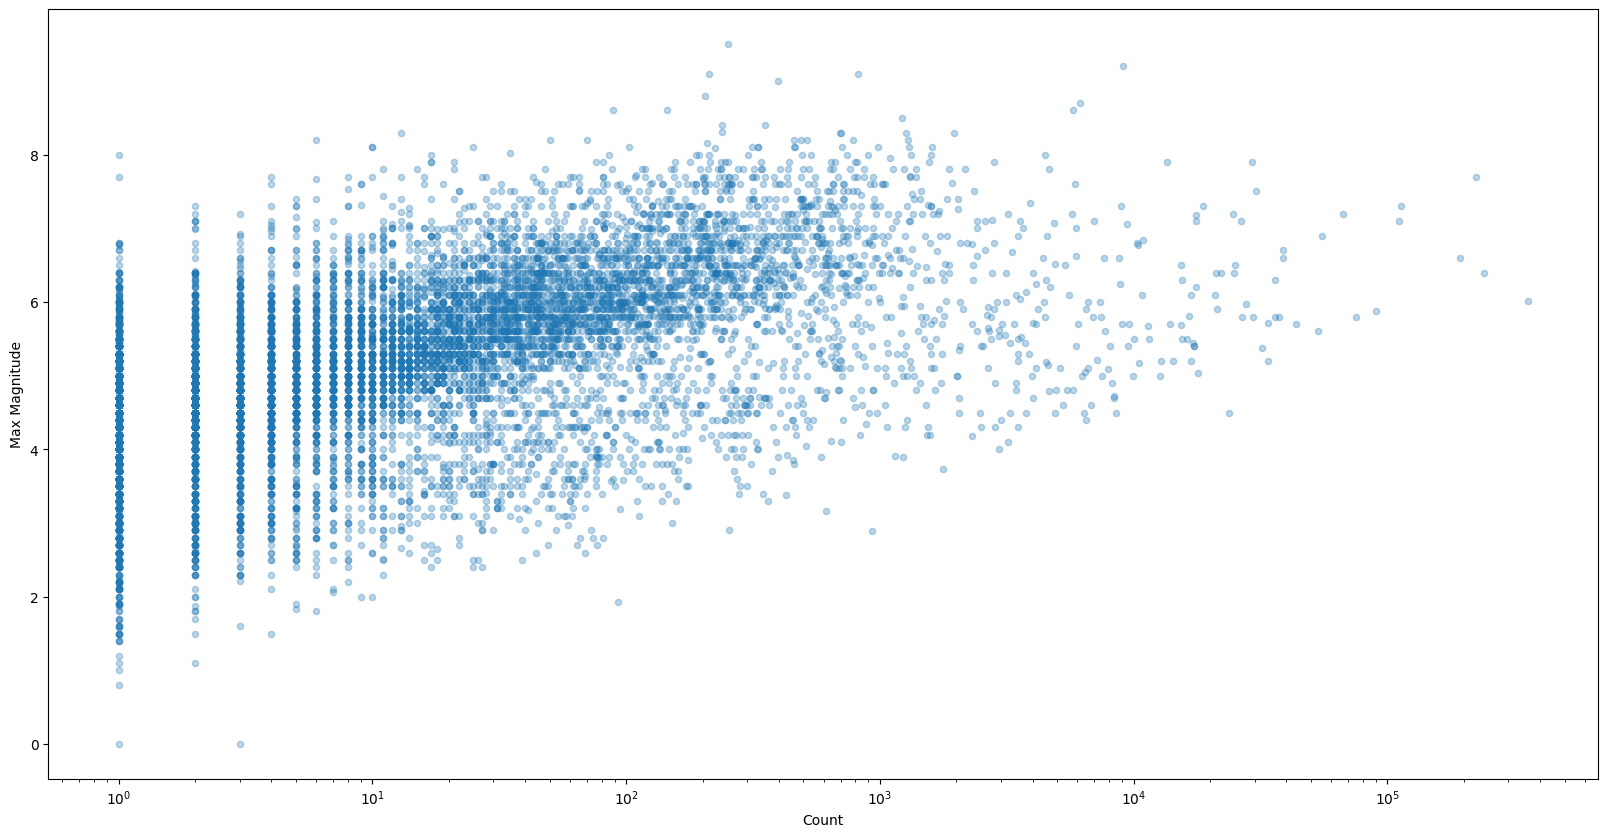

In [18]:
df.groupby(["pos"]).agg({"mag": "max", "time": "count"}).reset_index().plot.scatter(x="time", y="mag", figsize=(20, 10), alpha=0.3)
plt.xscale("log")
plt.xlabel("Count")
plt.ylabel("Max Magnitude")
plt.show()

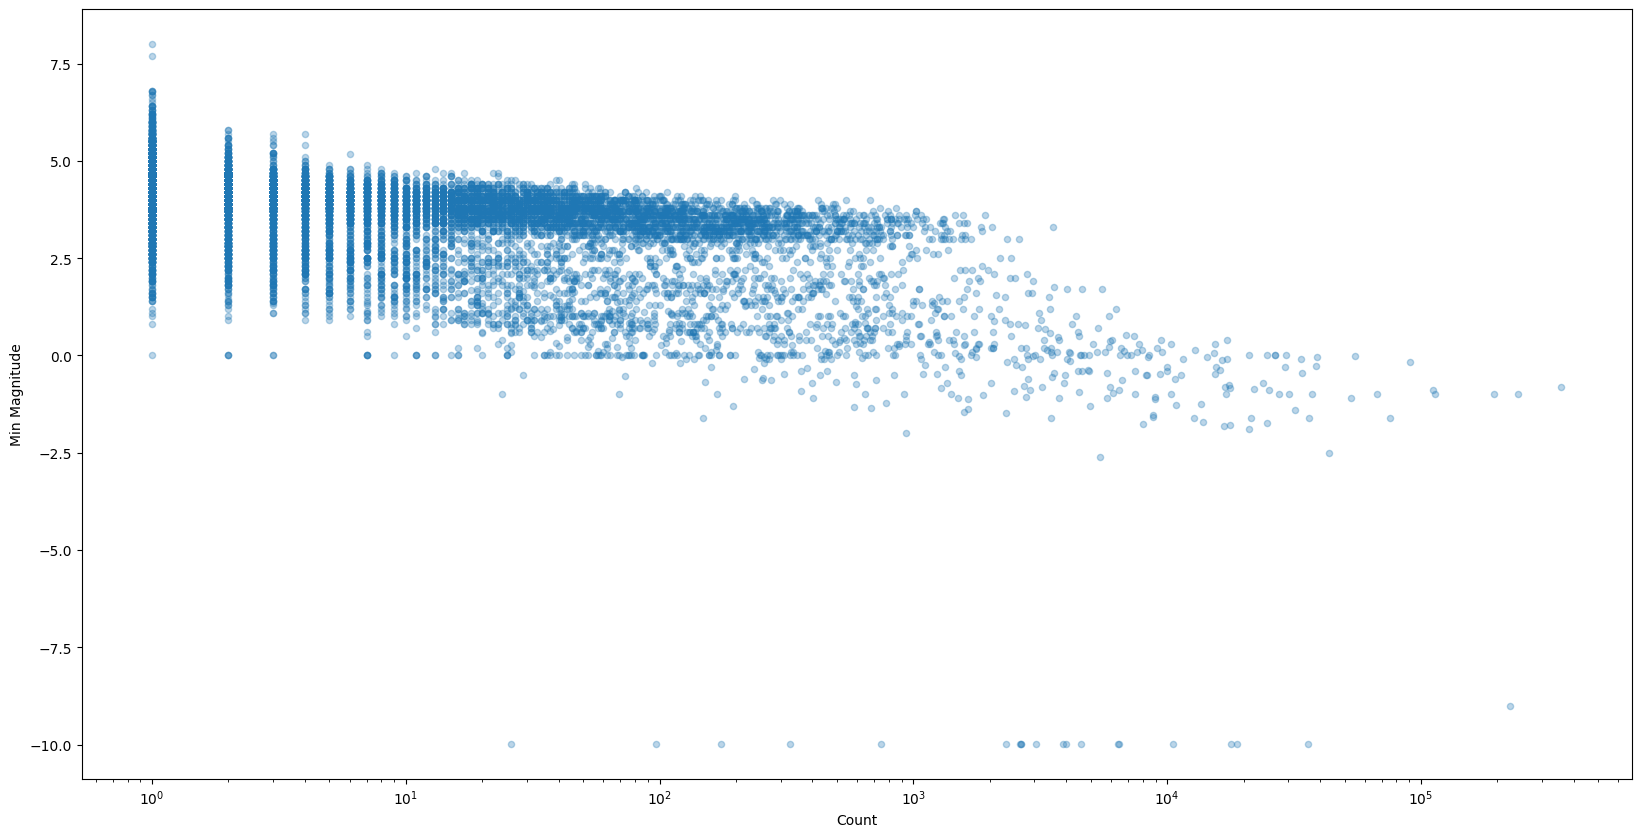

In [19]:
df.groupby(["pos"]).agg({"mag": "min", "time": "count"}).reset_index().plot.scatter(x="time", y="mag", figsize=(20, 10), alpha=0.3)
plt.xscale("log")
plt.xlabel("Count")
plt.ylabel("Min Magnitude")
plt.show()

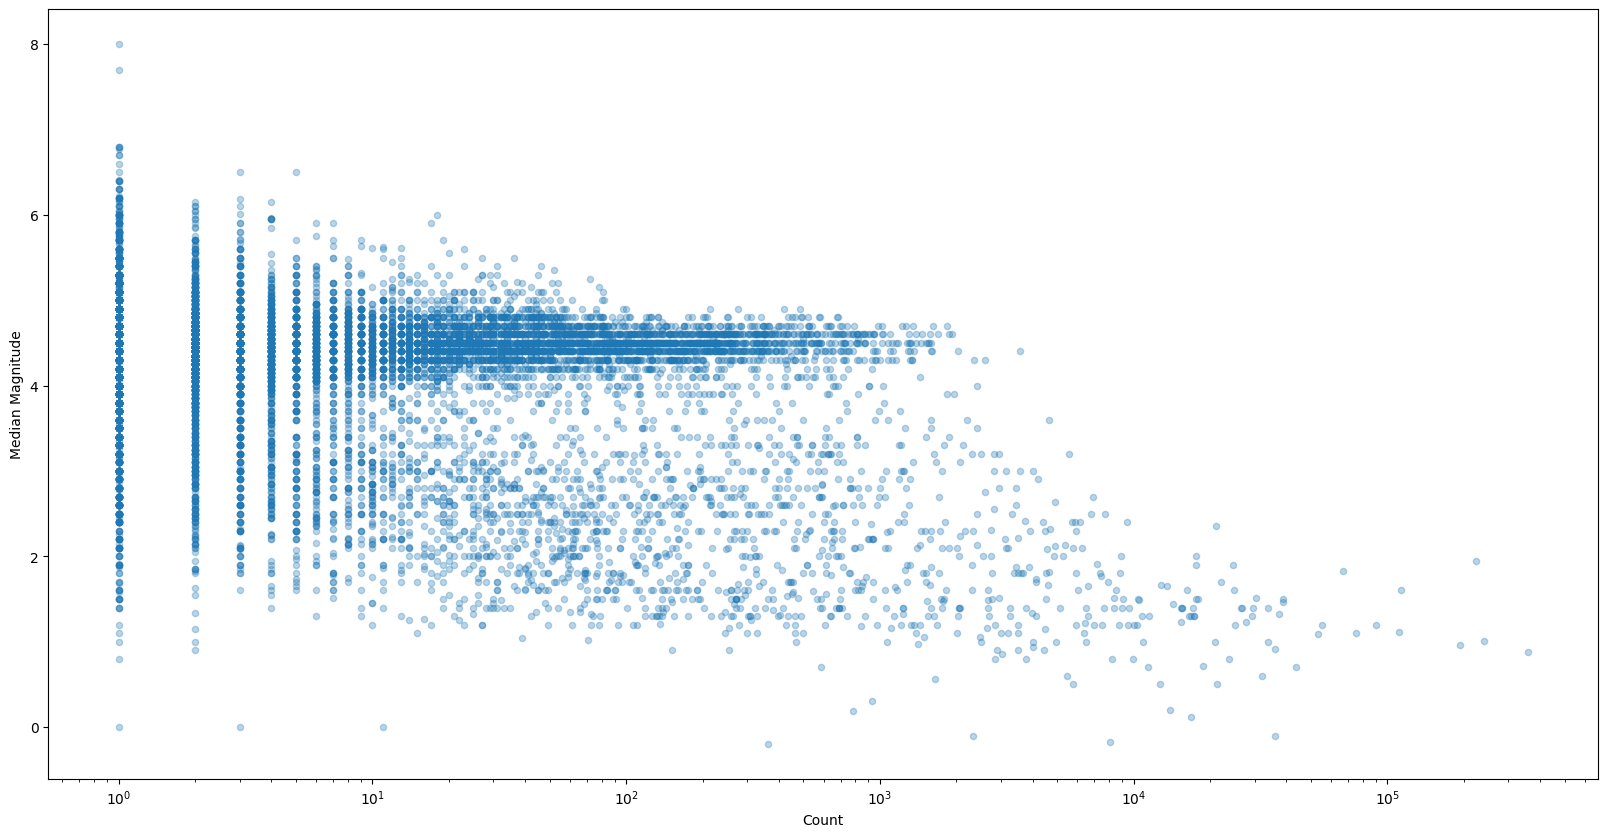

In [20]:
df.groupby(["pos"]).agg({"mag": "median", "time": "count"}).reset_index().plot.scatter(x="time", y="mag", figsize=(20, 10), alpha=0.3)
plt.xscale("log")
plt.xlabel("Count")
plt.ylabel("Median Magnitude")
plt.show()